## Tensorflow做线性回归的例子
Tensorflow更像是一个通用库，所以linear regression这样的模型也是可以完成的。

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# 设定的超参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# 构造一些数据
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf 计算图的 输入
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 设定模型权重
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# 构建一个线性回归模型
pred = tf.add(tf.mul(X, W), b)

In [6]:
# 均方误差
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# 初始化变量
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.149743423 W= 0.0991951 b= 1.88342
Epoch: 0100 cost= 0.141359642 W= 0.10814 b= 1.81907
Epoch: 0150 cost= 0.133942679 W= 0.116553 b= 1.75855
Epoch: 0200 cost= 0.127380908 W= 0.124465 b= 1.70163
Epoch: 0250 cost= 0.121575624 W= 0.131907 b= 1.64809
Epoch: 0300 cost= 0.116439626 W= 0.138907 b= 1.59774
Epoch: 0350 cost= 0.111895882 W= 0.14549 b= 1.55038
Epoch: 0400 cost= 0.107876271 W= 0.151681 b= 1.50584
Epoch: 0450 cost= 0.104320094 W= 0.157504 b= 1.46395
Epoch: 0500 cost= 0.101173691 W= 0.162981 b= 1.42455
Epoch: 0550 cost= 0.098389953 W= 0.168132 b= 1.38749
Epoch: 0600 cost= 0.095927022 W= 0.172977 b= 1.35264
Epoch: 0650 cost= 0.093747914 W= 0.177534 b= 1.31986
Epoch: 0700 cost= 0.091819890 W= 0.18182 b= 1.28903
Epoch: 0750 cost= 0.090114027 W= 0.185851 b= 1.26003
Epoch: 0800 cost= 0.088604674 W= 0.189642 b= 1.23275
Epoch: 0850 cost= 0.087269388 W= 0.193207 b= 1.2071
Epoch: 0900 cost= 0.086087912 W= 0.196561 b= 1.18298
Epoch: 0950 cost= 0.085042454 W= 0.199715 b= 1.16

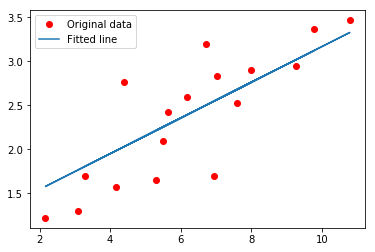

In [8]:
# 在session中启动计算图
with tf.Session() as sess:
    sess.run(init)

    # 拟合训练数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #每个epoch输出信息
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# 结果如下